# SVM

In [1]:
from sklearn.datasets import make_classification

In [17]:
from matplotlib import pyplot as plt
import numpy as np

In [18]:
X,Y = make_classification(n_classes=2,n_samples=400,n_clusters_per_class=1,n_features=2,n_informative=2,n_redundant=0,random_state=3)

In [48]:
Y[Y==0] = -1
#print(Y)

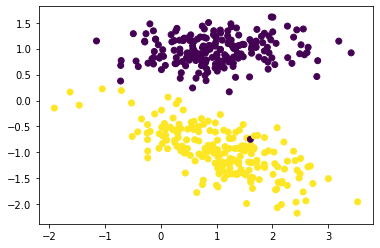

In [43]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [56]:
class SVM:
    
    def __init__(self,C=1.0):
        self.C = C
        self.W = 0
        self.b = 0
        
    def hingeLoss(self,W,b,X,Y):
        
        loss = 0.0
        loss += 0.5*np.dot(W,W.T)
        
        m = X.shape[0]
        
        for i in range(m):
            ti = Y[i]*(np.dot(W,X[i].T)+b)
            loss += self.C*max(0,(1-ti))
            
        return loss[0][0]
    
    def fit(self,X,Y,batch_size=100,learning_rate=0.001,maxItr=300):
        
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        
        n = learning_rate
        c = self.C
        
        W = np.zeros((1,no_of_features))
        b = 0
        
        print(self.hingeLoss(W,b,X,Y))  
        
        losses = []
        
        for i in range(maxItr):
            
            l = self.hingeLoss(W,b,X,Y)
            losses.append(l)
            
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)

            for batch_start in range(0,no_of_samples,batch_size):
                
                gradw = 0
                gradb = 0
                
                for j in range(batch_start, batch_start+batch_size):
                    if j<no_of_samples:
                        i = ids[j]
                        ti = Y[i]*(np.dot(W,X[i].T)+b)
                        
                        if ti>1:
                            gradw += 0
                            gradb += 0
                        else:
                            gradw += c*Y[i]*X[i]
                            gradb += c*Y[i]
                            
                W = W - n*W + n*gradw
                b = b + n*gradb
        
        self.W = W
        self.b = b
        return W,b,losses
                
            

In [57]:
print(X.shape)

(400, 2)


In [84]:
mySVM = SVM(C=1)

In [85]:
W,b,losses = mySVM.fit(X,Y,maxItr=100)
print(W,b)

400.0
[[-0.32292521 -2.03543502]] 0.38600000000000023


In [86]:
print(losses)

[400.0, 250.8310342944757, 120.15616691807867, 71.27236886041786, 53.09775592165826, 44.581972668076375, 39.36530694032636, 35.630988191206065, 32.836220378259846, 30.539617036695525, 28.648018892745878, 27.100897749177246, 25.793707740014316, 24.657989758357107, 23.741498519954778, 22.91901066454891, 22.240913455180994, 21.74481531513133, 21.315281521973997, 20.94303153071304, 20.59619669560233, 20.288648378021687, 20.014845058803747, 19.786723162026004, 19.570434589107812, 19.354982433724597, 19.14380377054767, 18.930081210256272, 18.735495751207626, 18.574520197007903, 18.41444287854334, 18.26783972076838, 18.135547512290778, 18.005320847802817, 17.88055175439112, 17.75323411499599, 17.6341537097603, 17.51571072316419, 17.399933443928767, 17.302231984908968, 17.21117741572141, 17.12329859128446, 17.05238038626059, 16.97690722060593, 16.916575750054776, 16.856474993967733, 16.796583619439218, 16.732106607164898, 16.672874967800848, 16.613887057966195, 16.55510148180039, 16.4965165618

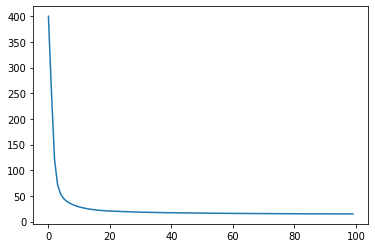

In [87]:
plt.plot(losses)
plt.show()

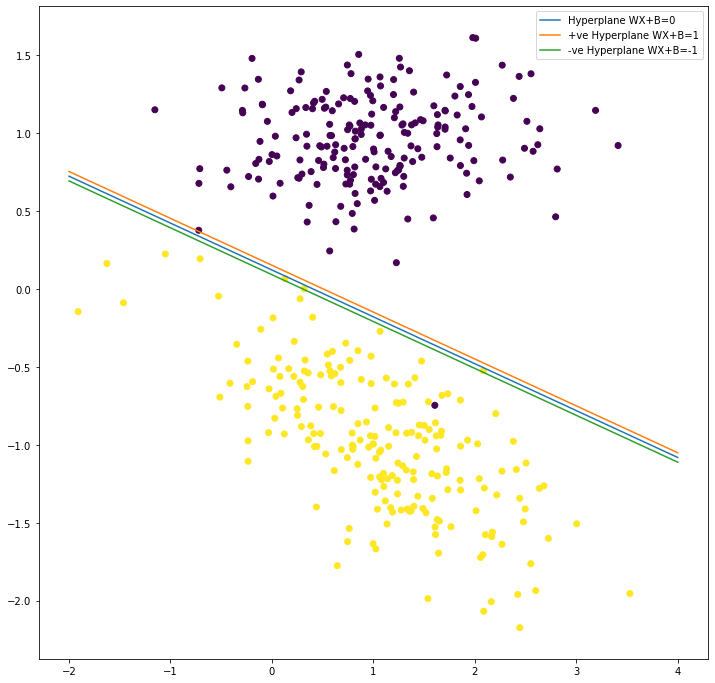

In [83]:
def plotHyperPlane(w1,w2,b):
    
    plt.figure(figsize=(12,12))
    
    x1 = np.linspace(-2,4,10)
    x2 = -(w1*x1+b)/w2
    
    xp = -(w1*x1+b+1)/w2
    xn = -(w1*x1+b-1)/w2
    
    plt.plot(x1,x2,label="Hyperplane WX+B=0")
    plt.plot(x1,xp,label="+ve Hyperplane WX+B=1")
    plt.plot(x1,xn,label="-ve Hyperplane WX+B=-1")
    
    plt.legend()
    
    plt.scatter(X[:,0],X[:,1],c=Y)
    plt.show()
    
plotHyperPlane(W[0,0],W[0,1],b)

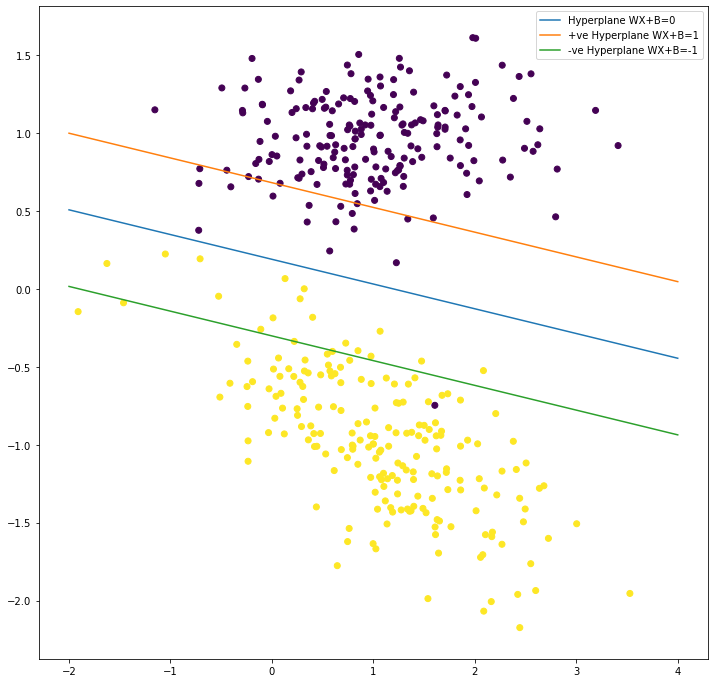

In [88]:
plotHyperPlane(W[0,0],W[0,1],b)

In [89]:
from sklearn.datasets import make_circles
from mpl_toolkits.mplot3d import Axes3D 

In [112]:
X,Y = make_circles(n_samples=500,noise=0.02)

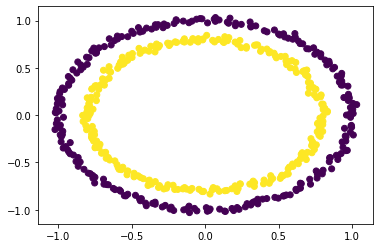

In [113]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [114]:
def phi(X):
    """Non-Linear Transformation"""
    
    X1 = X[:,0]
    X2 = X[:,1]
    X3 = X1**2 + X2**2
    
    X_ = np.zeros((X.shape[0],3))
    print(X_.shape)
    
    X_[:,:-1] = X
    X_[:,-1] = X3
    
    return X_

In [115]:
X_ = phi(X)

(500, 3)


In [116]:
print(X[:3,:])

[[ 0.81488891  0.07147931]
 [-0.77126828  0.6786305 ]
 [ 0.18270648 -0.98737262]]


In [120]:
print(X_[:3,:])

[[ 0.81488891  0.07147931  0.66915323]
 [-0.77126828  0.6786305   1.05539412]
 [ 0.18270648 -0.98737262  1.00828634]]


In [148]:
def plot3d(X,show=True):
    
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111,projection='3d')
    x1 = X[:,0]
    x2 = X[:,1]
    x3 = X[:,2]
    
    ax.scatter(x1,x2,x3,zdir='z',s=20,c=Y,depthshade=True)
    
    if show==True:
        plt.show()
    
    return ax

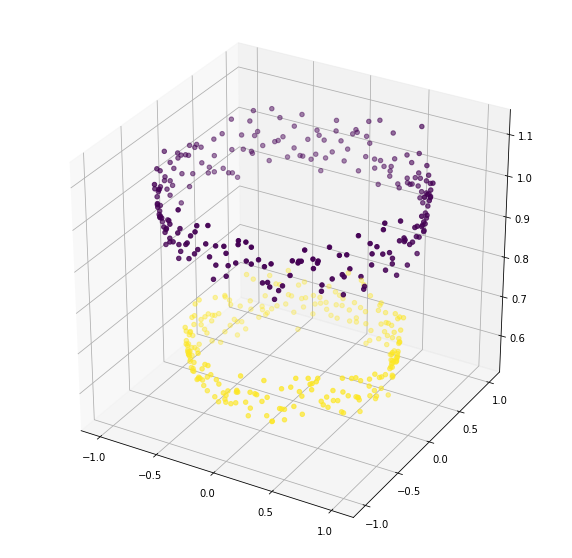

In [149]:
ax = plot3d(X_)

In [150]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [151]:
lr = LogisticRegression()

In [152]:
acc = cross_val_score(lr,X,Y,cv=5).mean()
print("Accuracy X(2D) is %.4f"%(acc*100))

Accuracy X(2D) is 41.6000


In [153]:
acc = cross_val_score(lr,X_,Y,cv=5).mean()
print("Accuracy X(3D) is %.4f"%(acc*100))

Accuracy X(3D) is 100.0000


In [154]:
lr.fit(X_,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [155]:
bias = lr.intercept_

In [156]:
wts = lr.coef_

In [157]:
xx,yy = np.meshgrid(range(-2,2),range(-2,2))
print(xx)
print(yy)

[[-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]]
[[-2 -2 -2 -2]
 [-1 -1 -1 -1]
 [ 0  0  0  0]
 [ 1  1  1  1]]


In [158]:
z = -(wts[0,0]*xx + wts[0,1]*yy + bias)/wts[0,2]
print(z)

[[0.81982053 0.82000183 0.82018313 0.82036442]
 [0.81978379 0.81996508 0.82014638 0.82032768]
 [0.81974704 0.81992833 0.82010963 0.82029093]
 [0.81971029 0.81989159 0.82007288 0.82025418]]


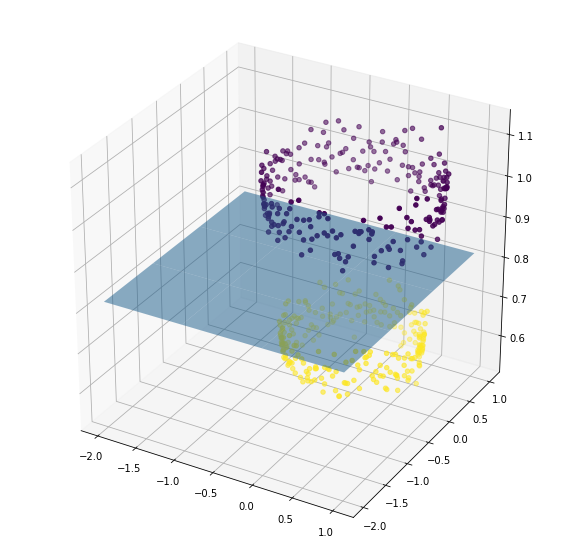

In [163]:
ax = plot3d(X_,False)
ax.plot_surface(xx,yy,z,alpha=0.5)

plt.show()

# Kernel SVM

In [164]:
from sklearn import svm

In [168]:
svc = svm.SVC(kernel='linear')

In [169]:
svc.fit(X,Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [170]:
svc.score(X,Y)

0.502

In [172]:
svc = svm.SVC(kernel='rbf')
svc.fit(X,Y)
svc.score(X,Y)

1.0

In [173]:
svc = svm.SVC(kernel='poly')
svc.fit(X,Y)
svc.score(X,Y)

0.546

In [174]:
def custom_kernel(x1,x2):
    return np.square(np.dot(x1,x2.T))

svc = svm.SVC(kernel=custom_kernel)
svc.fit(X,Y)
svc.score(X,Y)

1.0

# MNIST Classification

In [180]:
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [188]:
import multiprocessing

In [189]:
cpus = multiprocessing.cpu_count()
print(cpus)

8


In [181]:
params = [
    {
        'kernel':['linear','rbf','poly','sigmoid'],
        'C':[0.1,0.2,0.5,1.0,2.0,5.0]
    }
]

In [182]:
data = load_digits()

X = data.data
Y = data.target

print(X.shape,Y.shape)

(1797, 64) (1797,)


In [186]:
lr = LogisticRegression()
lr.fit(X,Y)
cross_val_score(lr,X,Y,scoring='accuracy',cv=5).mean()

/Users/ishaanwatts/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/ishaanwatts/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

0.9137650882079852

In [187]:
svc = svm.SVC()
svc.fit(X,Y)
cross_val_score(svc,X,Y,scoring='accuracy',cv=5).mean()

0.9632838130609718

In [190]:
gs = GridSearchCV(estimator=svm.SVC(),param_grid=params,scoring='accuracy',cv=5,n_jobs=cpus)

In [191]:
gs.fit(X,Y)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=8,
             param_grid=[{'C': [0.1, 0.2, 0.5, 1.0, 2.0, 5.0],
                          'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [192]:
gs.best_estimator_

SVC(C=5.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [193]:
gs.best_score_

0.9738502011761063